### Introduction to PyMC3

#### An example with Linear Regression

In [11]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0,.2, size)

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [20]:
from pymc3 import Model, Normal, HalfNormal
from pymc3 import find_MAP

In [22]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2 # Deterministic variable, if we don't have this statement
                                         # PyMC3 will not store mu as a value in the trace

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [23]:
map_estimate = find_MAP(model=basic_model)
map_estimate

logp = -164.8, ||grad|| = 7.6774: 100%|██████████| 17/17 [00:00<00:00, 2080.99it/s]  


{'alpha': array(1.01365899),
 'beta': array([1.46792489, 0.29358498]),
 'sigma_log__': array(0.11438772),
 'sigma': array(1.12118675)}

In [25]:
from pymc3 import NUTS, sample
from scipy import optimize

In [51]:
with basic_model:

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # instantiate sampler
    step = NUTS(scaling=start)

    # draw 2000 posterior samples
    trace = sample(2000, step, start=start)

/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/pymc3/tuning/starting.py:115: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn(
logp = -164.5:   5%|▌         | 271/5000 [00:00<00:00, 6009.13it/s] 


Optimization terminated successfully.
         Current function value: 164.496957
         Iterations: 6
         Function evaluations: 271


/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/theano/scan_module/scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/theano/scan_module/scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/theano/scan_module/scan_perform_ext.

In [52]:
trace['alpha']

array([1.02919062, 0.97801735, 0.80302892, ..., 0.91117001, 0.87801251,
       0.65235838])

In [28]:
from pymc3 import traceplot

/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be us

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffde0b9ba00>,
      dtype=object)

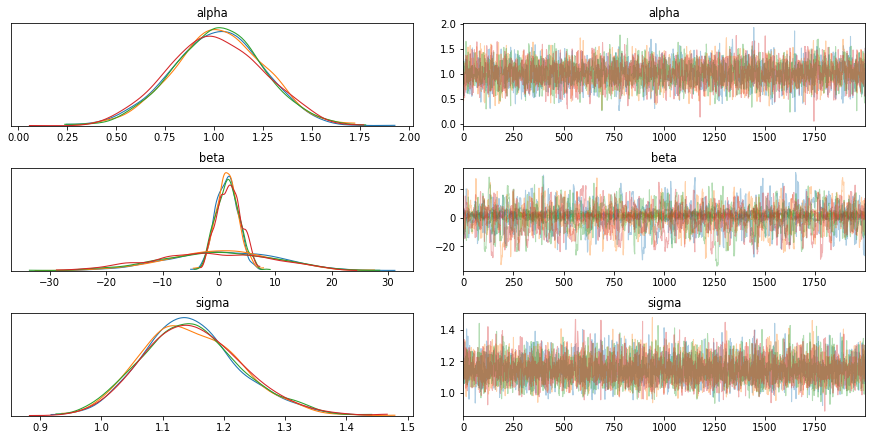

In [29]:
traceplot(trace)

In [30]:
az.summary(trace)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
alpha    1.015  0.232   0.580    1.452      0.004    0.003    4153.0  4094.0   
beta[0]  1.572  2.028  -2.210    5.334      0.062    0.046    1069.0   956.0   
beta[1] -0.234  9.916 -18.657   18.059      0.301    0.213    1085.0  1085.0   
sigma    1.147  0.080   1.003    1.303      0.001    0.001    7060.0  6958.0   

         ess_bulk  ess_tail  r_hat  
alpha      4147.0    4245.0    1.0  
beta[0]    1077.0    1131.0    1.0  
beta[1]    1093.0    1210.0    1.0  
sigma      7181.0    5055.0    1.0

In [31]:
from pymc3 import summary
summary(trace)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
alpha    1.015  0.232   0.580    1.452      0.004    0.003    4153.0  4094.0   
beta[0]  1.572  2.028  -2.210    5.334      0.062    0.046    1069.0   956.0   
beta[1] -0.234  9.916 -18.657   18.059      0.301    0.213    1085.0  1085.0   
sigma    1.147  0.080   1.003    1.303      0.001    0.001    7060.0  6958.0   

         ess_bulk  ess_tail  r_hat  
alpha      4147.0    4245.0    1.0  
beta[0]    1077.0    1131.0    1.0  
beta[1]    1093.0    1210.0    1.0  
sigma      7181.0    5055.0    1.0

Plot the posterior of the beta distribution with the set parameters and a credible interval for the Highest-Posterior Density which is the interval that has the given probability indicated by the HPD. 

What is the probability of getting a value given by x, we can't really calculate this exactly but we can compute this probability within a range  x + deltax, x - deltax. 

Here, instead of looking at the probability that x = 0.5, we look at the probability that it falls within the range 0.45 and 0.55 called the Region of Practical Equivalence or ROPE

ROPE allows us to make inferences about an event. If we suspect that the dice used at a casino is loaded, we can infer the probability of getting the value 3 from the six outcomes. Ideally, this should be 1/6 = 0.16666, however after computing the posterior our ROPE given by say 0.12 and 0.20 can either overlap with the HPD from the posterior density of the 3 completely, not overlap at all, partially overlap with the HPD. Complete overlap suggests that our computed probability coincides with what we would expect from a fair dice. If it does not overlap, it is not a fair dice and a partial overlap indicates that we cannot be certain that is either fair or unfair.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8b8963e80>],
      dtype=object)

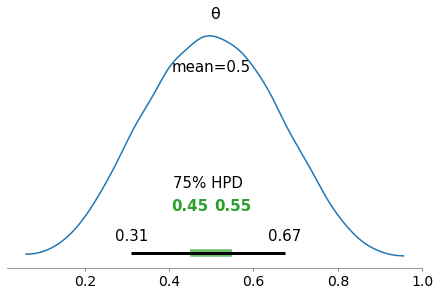

In [9]:
import numpy as np
from scipy import stats as stats 

np.random.seed(1)

az.plot_posterior({'θ':stats.beta.rvs(5, 5, size=20000)}, \
                  credible_interval=0.75, \
                  rope =[0.45, 0.55])

Another way to do this is by plotting a reference value on the posterior.

In [ ]:
az.plot_posterior({'θ':stats.beta.rvs(5, 5, size=20000)}, \
                  credible_interval=0.75, \
                  ref_val=0.5)

### Modeling with a Gaussian distribution

ADD DETAIL HERE

Gaussians are normally used to approximate a lot of practical data distributions. 

We read the chemical shifts data, and plot the density to getan idea of 
the data distribution. It looks somewhat like a Gaussian so maybe we can start
there. We have two parameters that is the mean and the standard deviation. 
We can estimate a prior for the mean by looking at the density and putting 
some bounds using a uniform prior. The standard deviation is however chosen to 
have a mean-centered half-normal prior - half-normal since the standard deviation 
cannot be negative. We can provide a hyperparameter for this by insoecting the
density again. These values decide how well we converge to a solution so good 
values are essential for good results. 



([<matplotlib.axis.YTick at 0x7ffde0c2f430>],
 <a list of 1 Text major ticklabel objects>)

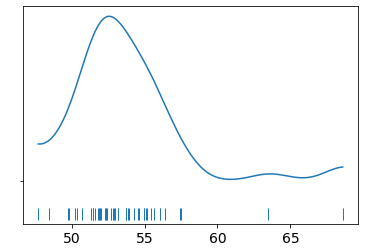

In [36]:
data = np.loadtxt('chemical_shifts.csv')
az.plot_kde(data, rug=True)
plt.yticks([0], alpha=0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:10<00:00, 575.58draws/s] 
WARNING (theano.gof.cmodule): Removing key file /Users/srijith.rajamohan/.theano/compiledir_macOS-10.15.6-x86_64-i386-64bit-i386-3.8.3-64/tmp4iht668s/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/srijith.rajamohan/.theano/compiledir_macOS-10.15.6-x86_64-i386-64bit-i386-3.8.3-64/tmp5r94blal/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/srijith.rajamohan/.theano/compiledir_macOS-10.15.6-x86_64-i386-64bit-i386-3.8.3-64/tmpbln5g7o5/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/srijith.rajamohan/.theano/compiledir_macOS-10.15.6-x86_64-i

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffdde81fe50>,
      dtype=object)

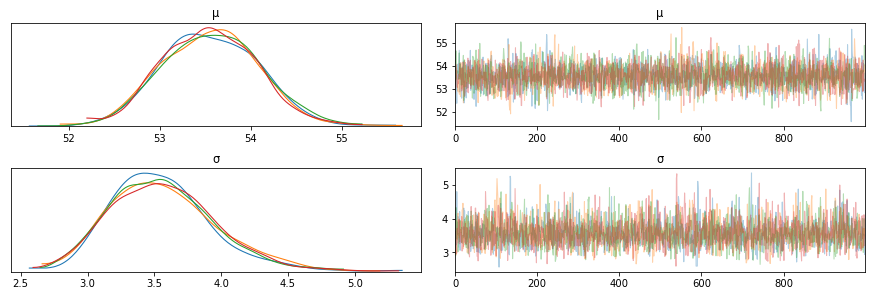

In [38]:
import pymc3 as pm
model_g = Model()

with model_g:
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data)
    trace_g = pm.sample(1000)
az.plot_trace(trace_g)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffdde932640>,
      dtype=object)

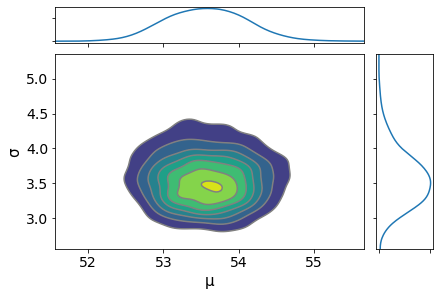

In [39]:
az.plot_joint(trace_g, kind='kde', fill_last=False)

In [40]:
az.summary(trace_g)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
μ  53.560  0.523  52.643   54.559      0.009    0.006    3675.0  3670.0   
σ   3.567  0.394   2.884    4.331      0.007    0.005    3309.0  3258.0   

   ess_bulk  ess_tail  r_hat  
μ    3678.0    2623.0    1.0  
σ    3338.0    2461.0    1.0

We can draw samples from the inferred posterior distribution to check to see how they line up with the observed values. Below, we draw 100 samples from this posterior. You are returned a dictionary for each of the observed variables in the model.

You can plot the dsitribution of these samples by passing this variable 'y_pred_g' as shown below. Setting mean=True in the call to plot_ppc computes the mean of the drawn samples and plots it as well.

Two things can be noted here, the mean of the predicted samples is close to the observed adta but the mean of this mean sample is slightly shifted to the right. Also, the variance of the samples; whether we can say qualitatively that this is acceptable or not depends on the problem. In general, the more representative data points available to us, the lower the variance.

Another thing to note here is that we modeled this using a Gaussian, however we have some outliers that need to be accoutned for which we cannot do well with a Gaussian distribution. 

In [48]:
y_pred_g = pm.sample_posterior_predictive(trace_g, 100, model_g)
y_pred_g

/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/pymc3/sampling.py:1246: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
100%|██████████| 100/100 [00:00<00:00, 1053.81it/s]


{'y': array([[50.72439737, 56.40415476, 55.20973854, ..., 50.53477913,
         53.36734127, 51.04980179],
        [50.79718692, 48.86441481, 54.39287061, ..., 54.45088179,
         55.19559144, 50.03543518],
        [58.31246059, 49.15543817, 52.82330444, ..., 53.78319874,
         51.41349068, 50.41652824],
        ...,
        [54.50745028, 52.69396329, 55.9388304 , ..., 56.90080353,
         53.16084775, 50.2914677 ],
        [51.92915458, 57.45588639, 51.55101272, ..., 54.1045734 ,
         47.11656635, 50.76151102],
        [46.62175618, 49.32868504, 60.38127268, ..., 59.51642012,
         44.38096287, 56.43073572]])}

arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


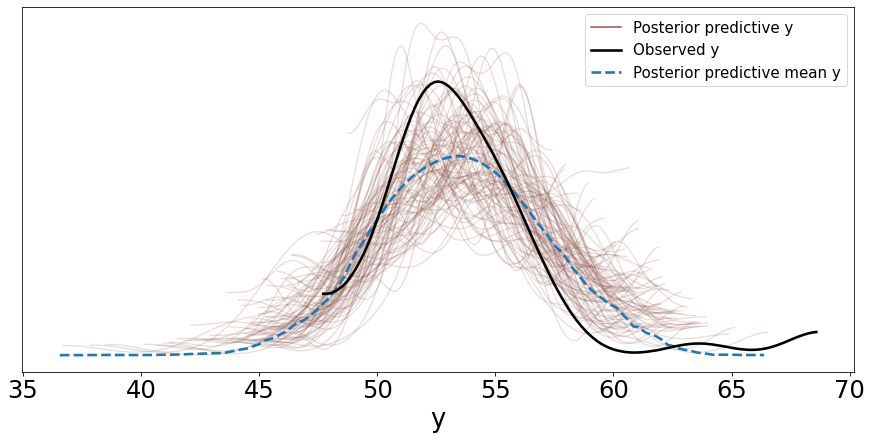

In [49]:
data_ppc = az.from_pymc3(trace=trace_g, posterior_predictive=y_pred_g)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=True)
ax[0].legend(fontsize=15)

### Robust models with a Student's t distribution

ADD DETAIL HERE

μ corresponds to the mean of the distribution

σ is the scale and corresponds to the standard deviation

ν is the degrees of freedom and takes between 0 and $\infty$. A value of 1 corresponds to the Cauchy distribution and indicates heavy tails, while infinty corresponds to a Gaussian.

INFO (theano.gof.compilelock): Refreshing lock /Users/srijith.rajamohan/.theano/compiledir_macOS-10.15.6-x86_64-i386-64bit-i386-3.8.3-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν, σ, μ]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [02:12<00:00, 45.32draws/s]  
INFO (theano.gof.compilelock): Refreshing lock /Users/srijith.rajamohan/.theano/compiledir_macOS-10.15.6-x86_64-i386-64bit-i386-3.8.3-64/lock_dir/lock
WARNING (theano.gof.compilelock): Refreshing lock failed, we release the lock before raising again the exception
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: InplaceDimShuffle{x}(TensorConstant{35.0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/theano/gof/opt.py", line 203

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffde472b160>,
      dtype=object)

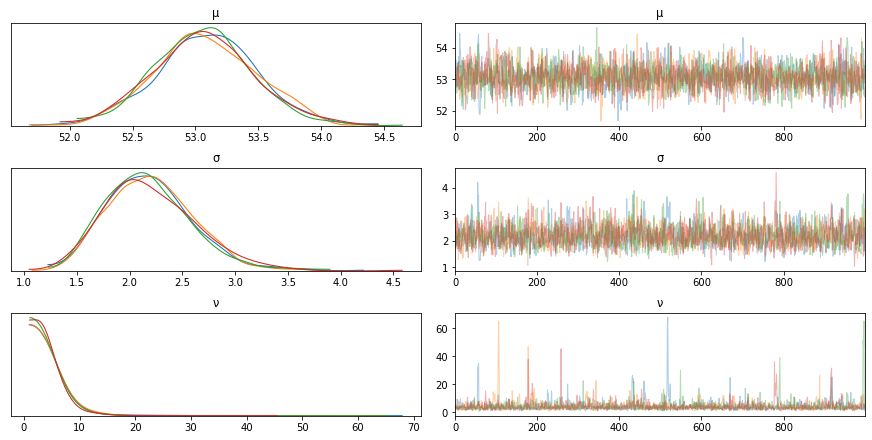

In [61]:
with pm.Model() as model_t:
    μ = pm.Uniform('μ', 40, 75) # mean
    σ = pm.HalfNormal('σ', sd=10)
    ν = pm.Exponential('ν', 1/30)
    y = pm.StudentT('y', mu=μ, sd=σ, nu=ν, observed=data)
    trace_t = pm.sample(1000)
az.plot_trace(trace_t)

/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/pymc3/sampling.py:1246: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
100%|██████████| 100/100 [00:00<00:00, 1624.06it/s]
arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


(40.0, 70.0)

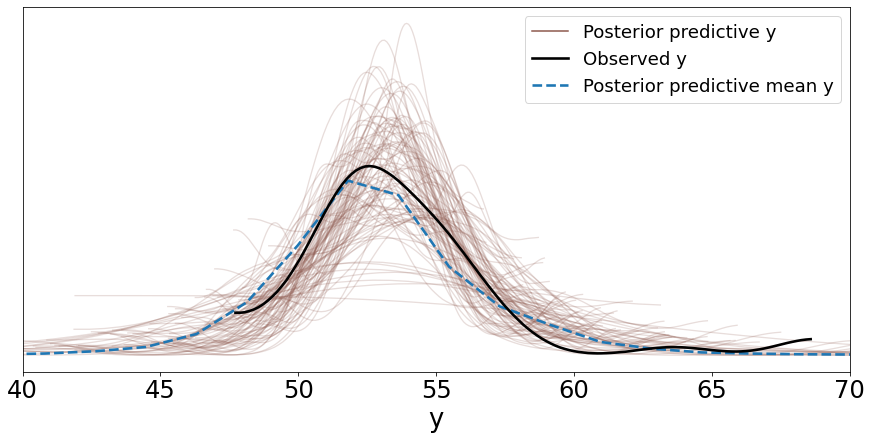

In [69]:
# Using a student's t distribution we notice that the outliers are captured more 
# accurately now and the model fits better
y_ppc_t = pm.sample_posterior_predictive(
    trace_t, 100, model_t, random_seed=123)
y_pred_t = az.from_pymc3(trace=trace_t, posterior_predictive=y_ppc_t)
az.plot_ppc(y_pred_t, figsize=(12, 6), mean=True)
ax[0].legend(fontsize=15)
plt.xlim(40, 70)

### Hierarchical models

Suppose we want to perform an analysis of water quality in a state and we divide this state into districts, there are two options to do this, study each district separately - we lose information especially if there is insufficient data for some districts. But we get a more detailed model per district.

The second option is to combine all the data and estimate the water quality of the state as a whole - More data but we lose granular information about each district.

The hierarchical model combines both of these options, by sharing information between the districts using hyperpriors that are priors over the parameter priors. In other words, instead of setting the parameter priors to a constant value, we draw it from another prior distribution called the hyperprior. This hyperprior is shared among all the districts and as a result sharing information between them.

In [89]:
# We measure the water samples for three districts, and we collect 30 samples 
# for each district. We count the number of samples that have contamination
# below the acceptable levels
N_samples = [30, 30, 30] # Total number of samples collected
G_samples = [18, 18, 18] # Number of samples with water contamination 
                         # below accepted levels
# Create an id for each of the 30 + 30 + 30 samples - 0,1,2 to indicate that they
# belong to different groups
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))


In [73]:
group_idx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [76]:
data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

The process of generating our samples looks like the following. First we set the parameters for the prior or the hyperpriors.

ADD DETAIL HERE

$ \mu \sim Beta(\alpha_p, \beta_p)  \\
  k \sim | Normal(0,\sigma_k) | \\
  \alpha =  \mu * k \\
  \beta = (1 - \mu) * k \\
$

These parameters are then used to define the priors. This is different from using a constant prior value as we saw before.

$
  \theta_i \sim Beta(\alpha_i, \beta_i) \\
  y_i \sim Bern(\theta_i)
$



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ, κ, μ]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:15<00:00, 664.60draws/s]
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/s

        mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
μ      0.585  0.095   0.411    0.769      0.001    0.001    5460.0  5378.0   
κ     12.431  6.229   2.237   23.976      0.077    0.055    6508.0  6508.0   
θ[0]   0.597  0.079   0.451    0.742      0.001    0.001    6726.0  6542.0   
θ[1]   0.596  0.079   0.440    0.736      0.001    0.001    6986.0  6962.0   
θ[2]   0.598  0.079   0.454    0.750      0.001    0.001    6988.0  6882.0   

      ess_bulk  ess_tail  r_hat  
μ       5452.0    4057.0    1.0  
κ       5721.0    4675.0    1.0  
θ[0]    6685.0    5661.0    1.0  
θ[1]    6980.0    6149.0    1.0  
θ[2]    6971.0    5208.0    1.0  


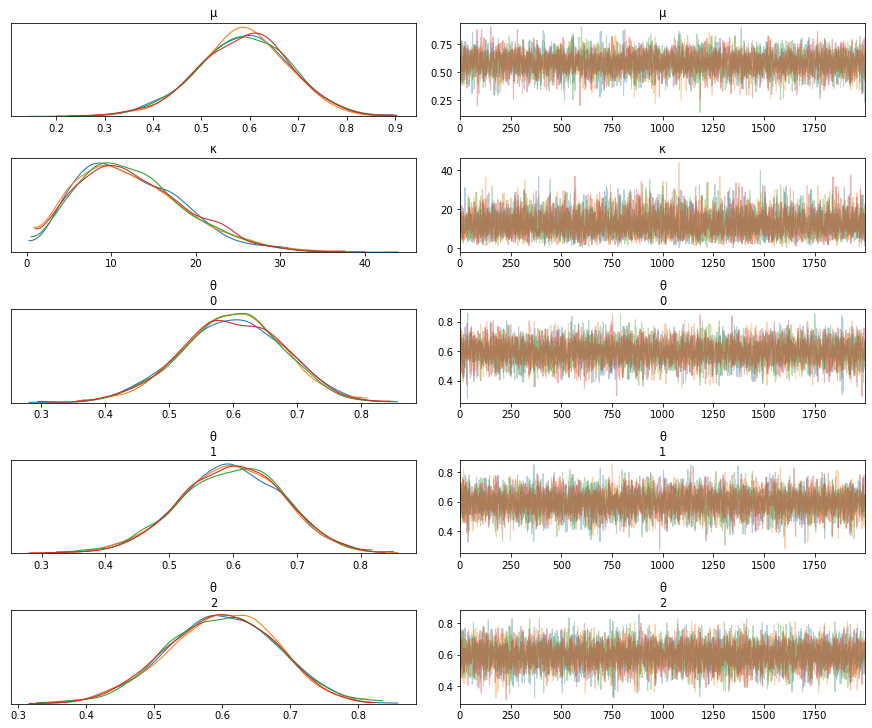

In [90]:
def get_hyperprior_model(data, N_samples, group_idx):
    with pm.Model() as model_h:
        μ = pm.Beta('μ', 1., 1.) # hyperprior
        κ = pm.HalfNormal('κ', 10) # hyperprior
        θ = pm.Beta('θ', alpha=μ*κ, beta=(1.0-μ)*κ, shape=len(N_samples)) # prior
        y = pm.Bernoulli('y', p=θ[group_idx], observed=data)
        trace_h = pm.sample(2000)
    az.plot_trace(trace_h)
    print(az.summary(trace_h))
    
get_hyperprior_model(data, N_samples, group_idx)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ, κ, μ]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:15<00:00, 660.29draws/s]
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/s

        mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
μ      0.218  0.080   0.087    0.376      0.001    0.001    6023.0  5673.0   
κ     12.165  6.266   1.605   23.532      0.079    0.056    6304.0  6304.0   
θ[0]   0.179  0.062   0.071    0.296      0.001    0.001    6985.0  6707.0   
θ[1]   0.178  0.062   0.062    0.288      0.001    0.001    7169.0  7169.0   
θ[2]   0.178  0.062   0.070    0.294      0.001    0.001    6943.0  6943.0   

      ess_bulk  ess_tail  r_hat  
μ       6045.0    5611.0    1.0  
κ       5636.0    4850.0    1.0  
θ[0]    6854.0    5172.0    1.0  
θ[1]    6816.0    4845.0    1.0  
θ[2]    6703.0    5362.0    1.0  


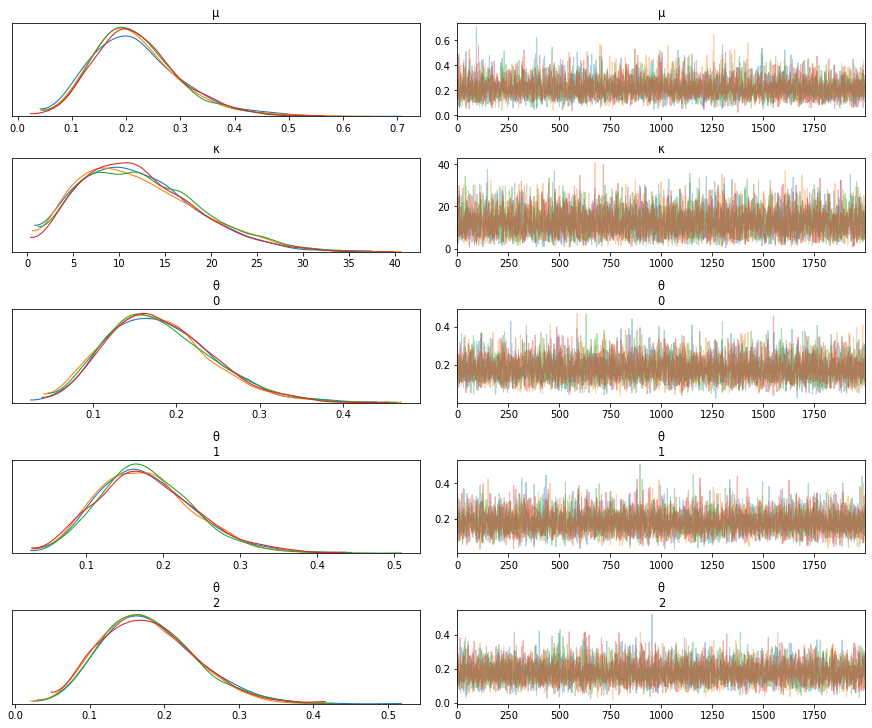

In [91]:
# Shrinkage - information is shared among the subgroups so we move away from extremes, which is great if
# we have outliers in our data subgroups especially when we do not have a lot of data - ADD DETAIL HERE

N_samples = [30, 30, 30] # Total number of samples collected
G_samples = [5, 5, 5] # Number of samples with water contamination 
                         # below accepted levels
# Create an id for each of the 30 + 30 + 30 samples - 0,1,2 to indicate that they
# belong to different groups
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

get_hyperprior_model(data, N_samples, group_idx)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ, κ, μ]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:10<00:00, 973.76draws/s]
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/s

       mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
μ     0.339  0.112   0.148    0.563      0.002    0.001    5530.0  5137.0   
κ     7.394  4.623   0.729   15.916      0.064    0.046    5206.0  5022.0   
θ[0]  0.548  0.087   0.385    0.710      0.001    0.001    5988.0  5988.0   
θ[1]  0.196  0.067   0.077    0.321      0.001    0.001    6316.0  6316.0   
θ[2]  0.196  0.069   0.076    0.324      0.001    0.001    5935.0  5935.0   

      ess_bulk  ess_tail  r_hat  
μ       5634.0    4996.0    1.0  
κ       5053.0    4915.0    1.0  
θ[0]    5981.0    5536.0    1.0  
θ[1]    6213.0    5438.0    1.0  
θ[2]    5604.0    3986.0    1.0  


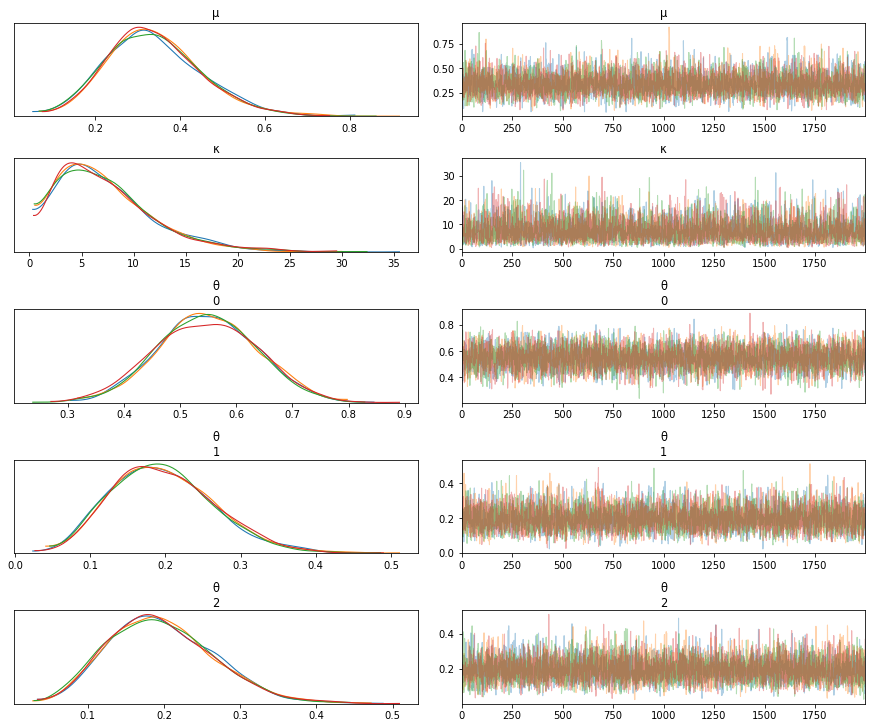

In [92]:
N_samples = [30, 30, 30] # Total number of samples collected
G_samples = [18, 5, 5] # Number of samples with water contamination 
                         # below accepted levels
# Create an id for each of the 30 + 30 + 30 samples - 0,1,2 to indicate that they
# belong to different groups
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

get_hyperprior_model(data, N_samples, group_idx)

Repeat the above with a constant prior instead of hyperpriors

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ, κ, μ]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:15<00:00, 658.86draws/s]
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/s

       mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
μ     0.394  0.132   0.141    0.634      0.002    0.001    6186.0  6032.0   
κ     4.163  2.922   0.339    9.482      0.044    0.034    4320.0  3786.0   
θ[0]  0.574  0.086   0.413    0.735      0.001    0.001    6513.0  6490.0   
θ[1]  0.575  0.088   0.408    0.738      0.001    0.001    6863.0  6686.0   
θ[2]  0.075  0.052   0.001    0.169      0.001    0.001    5671.0  4899.0   

      ess_bulk  ess_tail  r_hat  
μ       5950.0    5057.0    1.0  
κ       5086.0    4083.0    1.0  
θ[0]    6505.0    5387.0    1.0  
θ[1]    6845.0    5981.0    1.0  
θ[2]    5679.0    4673.0    1.0  


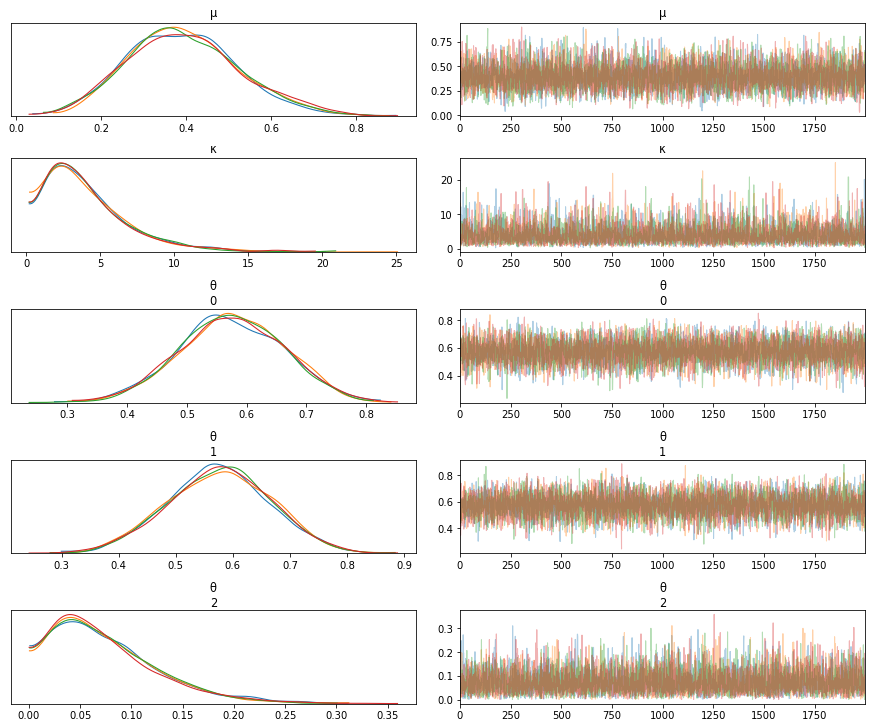

In [94]:
N_samples = [30, 30, 30] # Total number of samples collected
G_samples = [18, 18, 1] # Number of samples with water contamination 
                         # below accepted levels
# Create an id for each of the 30 + 30 + 30 samples - 0,1,2 to indicate that they
# belong to different groups
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

get_hyperprior_model(data, N_samples, group_idx)

#### Linear Regression

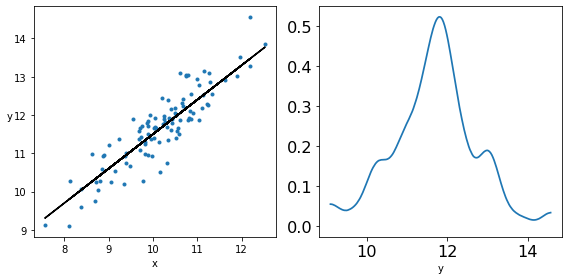

In [13]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)
x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real
_, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:13<00:00, 911.79draws/s] 
The acceptance probability does not match the target. It is 0.8797280779934536, but should be close to 0.8. Try to increase the number of tuning steps.
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/mat

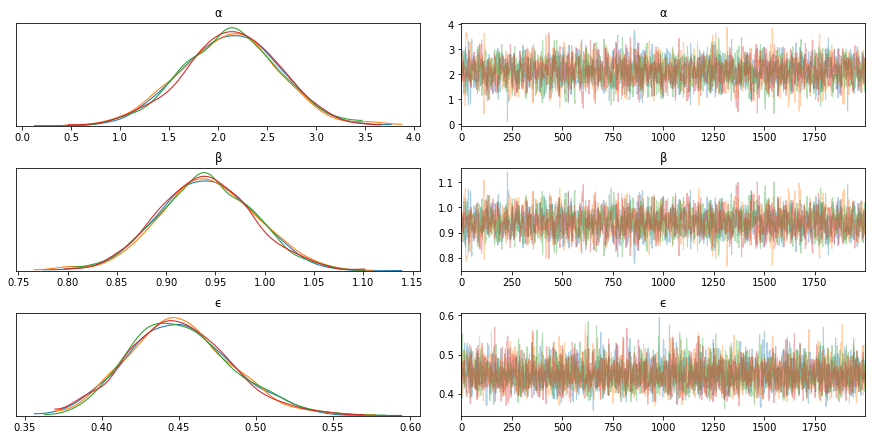

<Figure size 432x288 with 0 Axes>

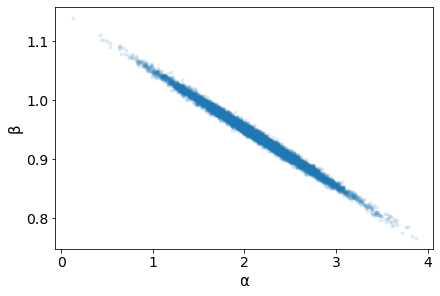

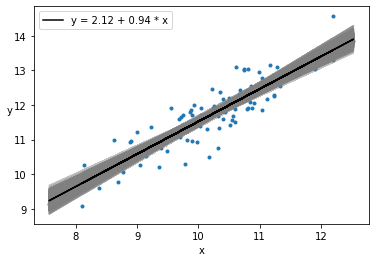

In [26]:
import pymc3 as pm

with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace_g = pm.sample(2000, tune=1000)
    
az.plot_trace(trace_g, var_names=['α', 'β', 'ϵ'])
plt.figure()
az.plot_pair(trace_g, var_names=['α', 'β'], plot_kwargs={'alpha': 0.1})
plt.figure()
plt.plot(x, y, 'C0.')
alpha_m = trace_g['α'].mean()
beta_m = trace_g['β'].mean()
draws = range(0, len(trace_g['α']), 10)
plt.plot(x, trace_g['α'][draws] + trace_g['β'][draws]
         * x[:, np.newaxis], c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()

ppc = pm.sample_posterior_predictive(trace_g,
                                     samples=2000,
                                     model=model_g)

plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
az.plot_hpd(x, ppc['y_pred'], credible_interval=0.5, color='gray')

In [48]:
import seaborn as sns

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df

dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89

Text(0, 0.5, 'y')

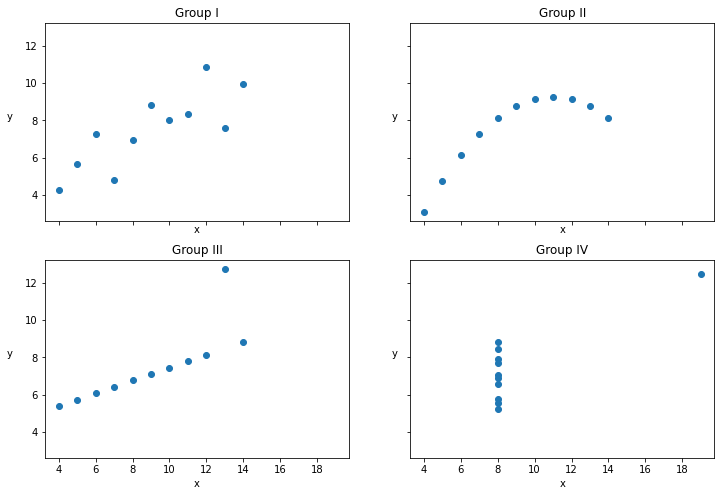

In [60]:
# Plot the 4 subgroups in the data

x_0 = df[df.dataset == 'I']['x'].values
y_0 = df[df.dataset == 'I']['y'].values
x_1 = df[df.dataset == 'II']['x'].values
y_1 = df[df.dataset == 'II']['y'].values
x_2 = df[df.dataset == 'III']['x'].values
y_2 = df[df.dataset == 'III']['y'].values
x_3 = df[df.dataset == 'IV']['x'].values
y_3 = df[df.dataset == 'IV']['y'].values
_, ax = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=True)

ax = np.ravel(ax)
ax[0].scatter(x_0, y_0)
ax[0].set_title('Group I')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0, labelpad=15)
ax[1].scatter(x_1, y_1)
ax[1].set_title('Group II')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y', rotation=0, labelpad=15)
ax[2].scatter(x_2, y_2)
ax[2].set_title('Group III')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y', rotation=0, labelpad=15)
ax[3].scatter(x_3, y_3)
ax[3].set_title('Group IV')
ax[3].set_xlabel('x')
ax[3].set_ylabel('y', rotation=0, labelpad=15)

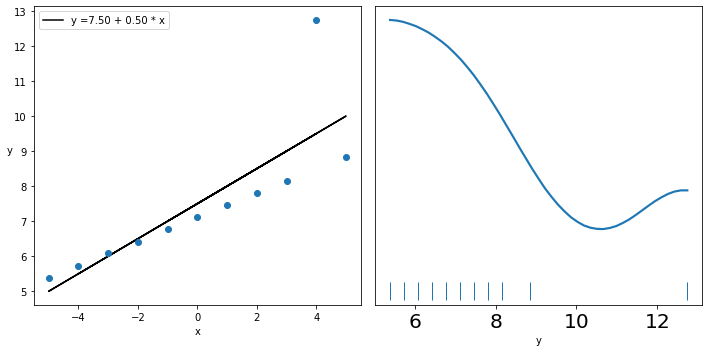

In [61]:
# Plot data group 3 and its Kernel density

x_2 = x_2 - x_2.mean()
_, ax = plt.subplots(1, 2, figsize=(10, 5))
beta_c, alpha_c = stats.linregress(x_2, y_2)[:2]
ax[0].plot(x_2, (alpha_c + beta_c * x_2), 'k',
           label=f'y ={alpha_c:.2f} + {beta_c:.2f} * x')
ax[0].plot(x_2, y_2, 'C0o')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].legend(loc=0)
az.plot_kde(y_2, ax=ax[1], rug=True)
ax[1].set_xlabel('y')
ax[1].set_yticks([])
plt.tight_layout()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_, ϵ, β, α]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:07<00:00, 1267.61draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


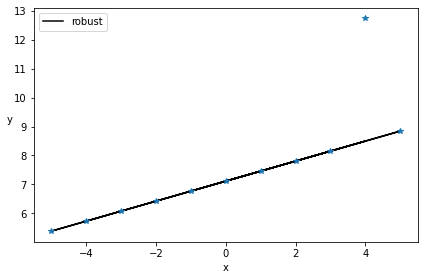

In [70]:
# Use PyMC3 to model this Linear Regression using a Student's t distribution
with pm.Model() as model_t:
    α = pm.Normal('α', mu=y_2.mean(), sd=1)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1)
    y_pred = pm.StudentT('y_pred', mu=α + β * x_2,
                         sd=ϵ, nu=ν, observed=y_2)
    trace_t = pm.sample(2000)
    
alpha_m = trace_t['α'].mean()
beta_m = trace_t['β'].mean()
plt.plot(x_2, alpha_m + beta_m * x_2, c='k', label='robust')
plt.plot(x_2, y_2, '*')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend(loc=2)
plt.tight_layout()

#### Hierarchical Linear Regression

In this example, we create 8 subgroups with 7 of them having 20 data points and the last one having a single data point. This is to illustrate the importance of imbalanced subgroups with sparse data. 

The data for the 8 groups are generated from a normal distribution of mean 10 and a standard deviation of 1. The parameters for the linear model are generated from normal and beta dsitributions.

Alpha parameters  [2.58304272 2.89098224 2.92614255 2.14646452 2.0341714  2.94333044
 2.38910517 2.69086179]


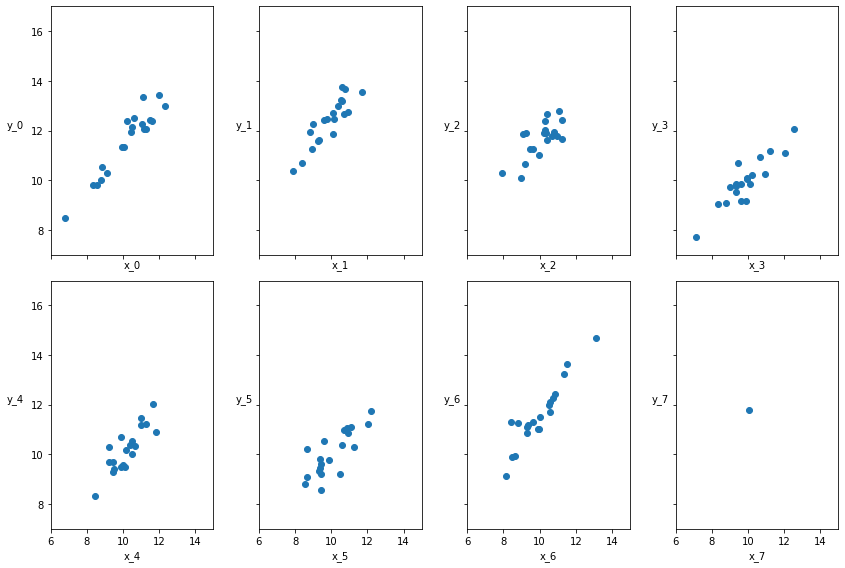

In [105]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)

np.random.seed(314)
alpha_real = np.random.normal(2.5, 0.5, size=M) 
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))
print("Alpha parameters ", alpha_real )

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real
_, ax = plt.subplots(2, 4, figsize=(12,8), sharex=True, sharey=True)

ax = np.ravel(ax)
j, k = 0, N
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', rotation=0, labelpad=15)
    ax[i].set_xlim(6, 15)
    ax[i].set_ylim(7, 17)     
    j += N
    k += N
plt.tight_layout()

#### We build a non-hierarchical model first

Note how the obtained $\alpha$ and $\beta$ values vary for each group, particularly the last one which is really off.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν, ϵ, β, α_tmp]
Sampling 4 chains, 1 divergences: 100%|██████████| 10000/10000 [00:16<00:00, 597.62draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has 

mean       sd   hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  \
α_tmp[0]  11.408    0.108   11.203   11.611      0.001    0.001   15991.0   
α_tmp[1]  12.518    0.106   12.319   12.721      0.001    0.001   16110.0   
α_tmp[2]  11.638    0.108   11.428   11.832      0.001    0.001   16019.0   
α_tmp[3]  10.079    0.106    9.880   10.279      0.001    0.001   15903.0   
α_tmp[4]  10.055    0.111    9.852   10.267      0.001    0.001   17533.0   
α_tmp[5]  10.026    0.109    9.826   10.236      0.001    0.001   18995.0   
α_tmp[6]  11.638    0.108   11.435   11.847      0.001    0.001   16582.0   
α_tmp[7]  11.697    0.496   10.718   12.615      0.004    0.003   15728.0   
β[0]       0.894    0.077    0.746    1.035      0.001    0.000   16530.0   
β[1]       0.878    0.115    0.664    1.098      0.001    0.001   17171.0   
β[2]       0.595    0.129    0.350    0.837      0.001    0.001   16237.0   
β[3]       0.700    0.088    0.537    0.866      0.001    0.000   16752.0   
β[4]       0.871    0.129    0.624    1.109      0.001    0.001   15577.0   
β[5]       0.679    0.104    0.493    0.880      0.001    0.001   17061.0   
β[6]       0.983    0.092    0.807    1.156      0.001    0.001   16108.0   
β[7]       0.431   10.085  -18.419   19.012      0.082    0.128   15147.0   
ϵ          0.462    0.034    0.398    0.526      0.000    0.000    9746.0   
ν         39.935   30.650    3.345   93.611      0.298    0.240   10588.0   
α[0]       2.426    0.789    0.912    3.874      0.006    0.005   16444.0   
α[1]       3.704    1.143    1.594    5.929      0.009    0.007   17246.0   
α[2]       5.664    1.304    3.196    8.145      0.010    0.008   15726.0   
α[3]       3.048    0.880    1.333    4.587      0.007    0.005   17581.0   
α[4]       1.309    1.320   -1.141    3.817      0.011    0.011   15486.0   
α[5]       3.207    1.058    1.240    5.180      0.008    0.006   17214.0   
α[6]       1.763    0.937   -0.085    3.448      0.007    0.006   16030.0   
α[7]       7.370  101.378 -178.970  197.336      0.824    1.273   15141.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
α_tmp[0]  15973.0   15962.0    5958.0    1.0  
α_tmp[1]  16102.0   16164.0    5525.0    1.0  
α_tmp[2]  16015.0   16010.0    6159.0    1.0  
α_tmp[3]  15903.0   15893.0    6150.0    1.0  
α_tmp[4]  17533.0   17580.0    6229.0    1.0  
α_tmp[5]  18975.0   18967.0    5644.0    1.0  
α_tmp[6]  16582.0   16570.0    5258.0    1.0  
α_tmp[7]  15728.0   15991.0    5531.0    1.0  
β[0]      16263.0   16656.0    5618.0    1.0  
β[1]      16520.0   17157.0    6008.0    1.0  
β[2]      15905.0   16286.0    6178.0    1.0  
β[3]      16297.0   16715.0    6293.0    1.0  
β[4]      15118.0   15594.0    6721.0    1.0  
β[5]      15919.0   16980.0    5619.0    1.0  
β[6]      15914.0   16134.0    5850.0    1.0  
β[7]       3120.0   15151.0    6270.0    1.0  
ϵ          9746.0    9784.0    5091.0    1.0  
ν          8160.0   10718.0    6008.0    1.0  
α[0]      12582.0   16511.0    5699.0    1.0  
α[1]      14545.0   17228.0    6108.0    1.0  
α[2]      14095.0   15796.0    5923.0    1.0  
α[3]      14909.0   17562.0    6158.0    1.0  
α[4]       6997.0   15473.0    6638.0    1.0  
α[5]      14452.0   17130.0    5348.0    1.0  
α[6]      10695.0   16052.0    5964.0    1.0  
α[7]       3173.0   15150.0    6374.0    1.0

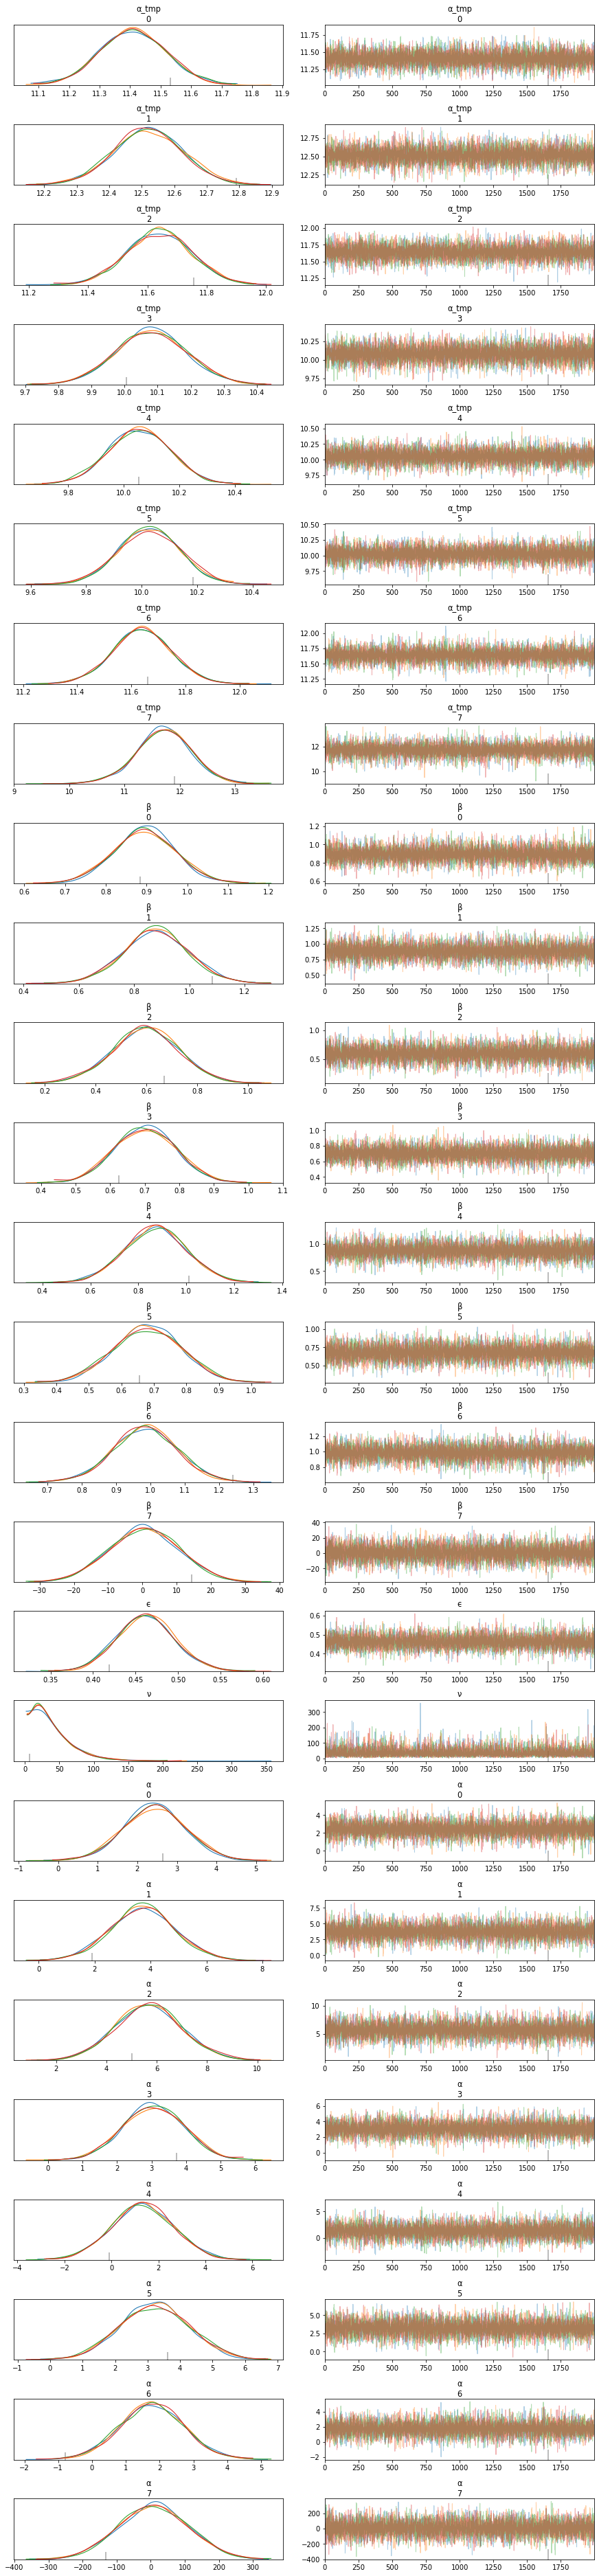

<Figure size 432x288 with 0 Axes>

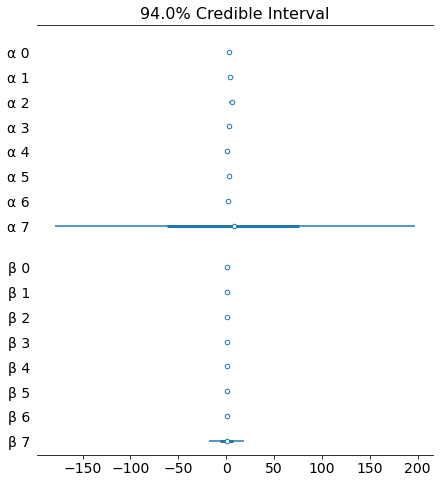

In [107]:
# Center the data
x_centered = x_m - x_m.mean()

with pm.Model() as unpooled_model:
    # Note the M prior parameters for the M groups
    α_tmp = pm.Normal('α_tmp', mu=2, sd=5, shape=M)
    β = pm.Normal('β', mu=0, sd=10, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)
    
    y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered,
                         sd=ϵ, nu=ν, observed=y_m)
    # Rescale alpha back - after x had been centered the computed alpha is different from the original alpha
    α = pm.Deterministic('α', α_tmp - β * x_m.mean())
    trace_up = pm.sample(2000)

az.plot_trace(trace_up)
plt.figure()
az.plot_forest(trace_up, var_names=['α', 'β'], combined=True)
az.summary(trace_up)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν, ϵ, β, α_tmp, β_σ, β_μ, α_σ_tmp, α_μ_tmp]
Sampling 4 chains, 4 divergences: 100%|██████████| 6000/6000 [00:38<00:00, 157.30draws/s]
The acceptance probability does not match the target. It is 0.9921074533781558, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9763599185064034, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9803571635027446, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9822845144925312, but should be close to 0.8. Try to incre

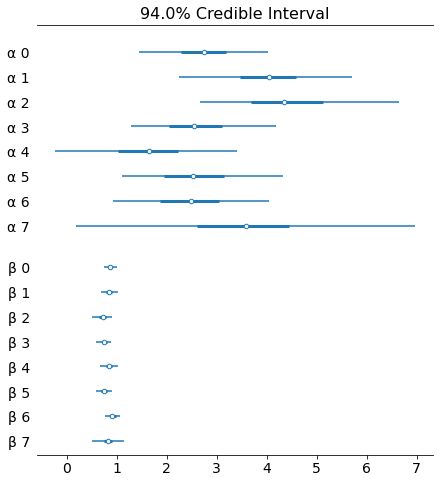

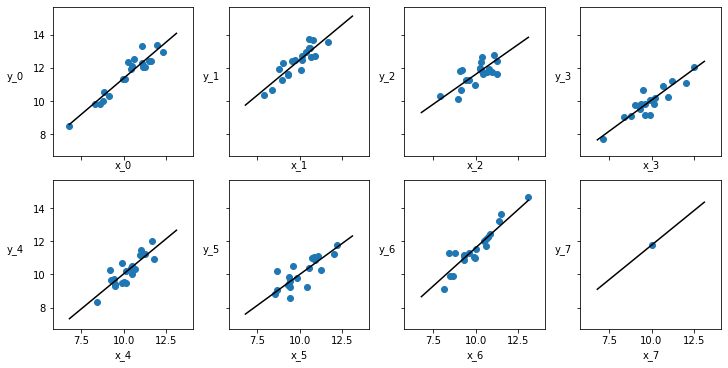

In [119]:
with pm.Model() as hierarchical_model:
    # Hyperpriors - we add these instead of setting the prior values to a constant
    # Note that there exists only one hyperprior  for all M groups, shared hyperprior
    α_μ_tmp = pm.Normal('α_μ_tmp', mu=100, sd=1) # try changing these hyperparameters
    α_σ_tmp = pm.HalfNormal('α_σ_tmp', 10) # try changing these hyperparameters
    β_μ = pm.Normal('β_μ', mu=10, sd=2) # reasonable changes do not have an impact
    β_σ = pm.HalfNormal('β_σ', sd=5)
    
    # priors - note that the prior parameters are no longer a constant
    α_tmp = pm.Normal('α_tmp', mu=α_μ_tmp, sd=α_σ_tmp, shape=M)
    β = pm.Normal('β', mu=β_μ, sd=β_σ, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)
    y_pred = pm.StudentT('y_pred',
                         mu=α_tmp[idx] + β[idx] * x_centered,
                         sd=ϵ, nu=ν, observed=y_m)
    α = pm.Deterministic('α', α_tmp - β * x_m.mean())
    α_μ = pm.Deterministic('α_μ', α_μ_tmp - β_μ *
                           x_m.mean())
    α_σ = pm.Deterministic('α_sd', α_σ_tmp - β_μ * x_m.mean())
    trace_hm = pm.sample(1000)

az.plot_forest(trace_hm, var_names=['α', 'β'], combined=True)

_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', labelpad=17, rotation=0)
    alpha_m = trace_hm['α'][:, i].mean()
    beta_m = trace_hm['β'][:, i].mean()
    ax[i].plot(x_range, alpha_m + beta_m * x_range, c='k',
               label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N



#### Polynomial Regression for nonlinear data

Text(0, 0.5, 'y')

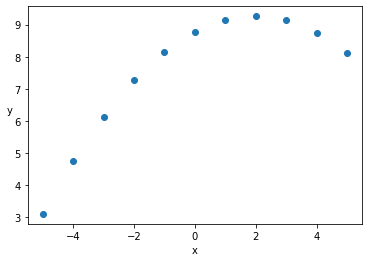

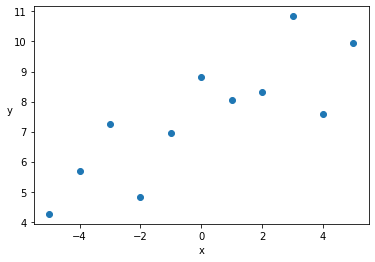

In [96]:
x_1_centered = x_1 - x_1.mean()
plt.scatter(x_1_centered, y_1)
plt.xlabel('x')
plt.ylabel('y', rotation=0)

plt.figure()
x_0_centered = x_0 - x_0.mean()
plt.scatter(x_0_centered, y_0)
plt.xlabel('x')
plt.ylabel('y', rotation=0)

In [90]:
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y_1.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x_1_centered + β2 * x_1_centered**2
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_1)
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β2, β1, α]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:07<00:00, 1356.01draws/s]
The acceptance probability does not match the target. It is 0.9089859772466903, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9021219338896374, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9230211312558135, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9088987869546175, but should be close to 0.8. Try to increase the number of tuning steps.


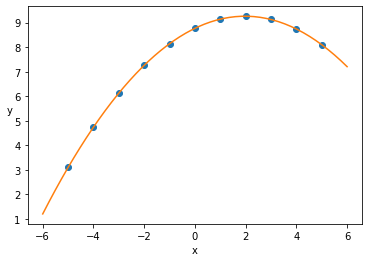

In [91]:
x_p = np.linspace(-6, 6)
y_p = trace['α'].mean() + trace['β1'].mean() * x_p + trace['β2'].mean() * x_p**2
plt.scatter(x_1_centered, y_1)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p, c='C1')


In [97]:
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y_0.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x_0_centered + β2 * x_0_centered**2
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_0)
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β2, β1, α]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:05<00:00, 1694.74draws/s]
The acceptance probability does not match the target. It is 0.8888288607470162, but should be close to 0.8. Try to increase the number of tuning steps.


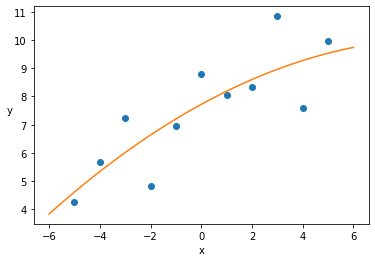

In [99]:
x_p = np.linspace(-6, 6)
y_p = trace['α'].mean() + trace['β1'].mean() * x_p + trace['β2'].mean() * x_p**2
plt.scatter(x_0_centered, y_0)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p, c='C1')

#### Multiple Linear Regression

In [73]:
np.random.seed(314)

# N is the total number of observations 
N = 100
# m is 2, the number of independent variables
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)

# X is # n x m
X = np.array([np.random.normal(i, j, N) for i, j in zip([10, 2], [1, 1.5])]).T 
X_mean = X.mean(axis=0, keepdims=True)
X_centered = X - X_mean
y = alpha_real + np.dot(X, beta_real) + eps_real

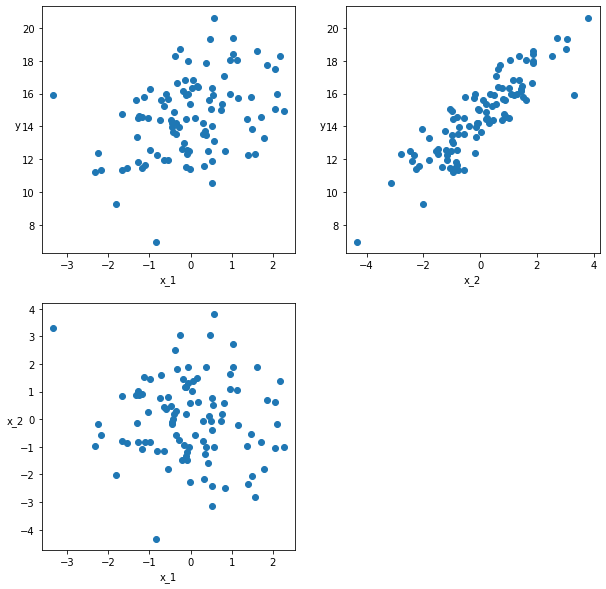

In [83]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 10))
    for idx, x_i in enumerate(x.T):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y)
        plt.xlabel(f'x_{idx+1}')
        plt.ylabel(f'y', rotation=0)
    plt.subplot(2, 2, idx+2)
    plt.scatter(x[:, 0], x[:, 1])
    plt.xlabel(f'x_{idx}')
    plt.ylabel(f'x_{idx+1}', rotation=0)

scatter_plot(X_centered, y)

In [86]:
with pm.Model() as model_mlr:
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α_tmp + pm.math.dot(X_centered, β)
    α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β))
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace = pm.sample(2000)

az.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α_tmp]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:07<00:00, 1412.96draws/s]
The acceptance probability does not match the target. It is 0.8791241944361066, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8833758650790704, but should be close to 0.8. Try to increase the number of tuning steps.


mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α_tmp  14.596  0.048  14.507   14.686      0.001    0.000    8240.0  8240.0   
β[0]    0.968  0.044   0.884    1.048      0.000    0.000    7985.0  7963.0   
β[1]    1.470  0.032   1.410    1.531      0.000    0.000    9461.0  9454.0   
ϵ       0.474  0.036   0.410    0.540      0.000    0.000    8755.0  8548.0   
α[0]    1.854  0.454   1.035    2.743      0.005    0.004    7881.0  7766.0   

       ess_bulk  ess_tail  r_hat  
α_tmp    8240.0    6255.0    1.0  
β[0]     8000.0    5933.0    1.0  
β[1]     9468.0    6563.0    1.0  
ϵ        8982.0    6097.0    1.0  
α[0]     7912.0    5866.0    1.0